In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
test=pd.read_csv("/content/drive/MyDrive/Projects/testhouse.csv")
train=pd.read_csv("/content/drive/MyDrive/Projects/trainhouse.csv")

**Exploring the data**

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train.shape

(1460, 81)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [48]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
test.shape

(1459, 80)

Dropping the 'Id' column from train data because it's not necessary

In [8]:
train=train.drop('Id',axis=1)

In [10]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [9]:
ncol=train.shape[1]

**Check for missing values and take appropriate action**

In [11]:
for i in range(0,ncol):
  print((i+1),"th column has ",train.iloc[:,i].isnull().sum()," missing values")

1 th column has  0  missing values
2 th column has  0  missing values
3 th column has  259  missing values
4 th column has  0  missing values
5 th column has  0  missing values
6 th column has  1369  missing values
7 th column has  0  missing values
8 th column has  0  missing values
9 th column has  0  missing values
10 th column has  0  missing values
11 th column has  0  missing values
12 th column has  0  missing values
13 th column has  0  missing values
14 th column has  0  missing values
15 th column has  0  missing values
16 th column has  0  missing values
17 th column has  0  missing values
18 th column has  0  missing values
19 th column has  0  missing values
20 th column has  0  missing values
21 th column has  0  missing values
22 th column has  0  missing values
23 th column has  0  missing values
24 th column has  0  missing values
25 th column has  8  missing values
26 th column has  8  missing values
27 th column has  0  missing values
28 th column has  0  missing val

Since most features have few missing values we will proceed as it is.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-12-b5d15e55ff7a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


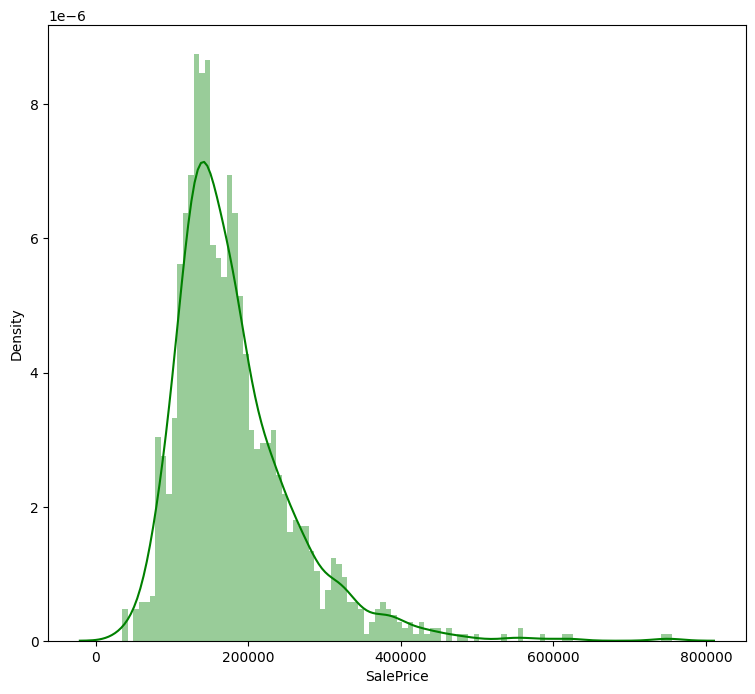

In [12]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Look at how the numerical features are distributed

In [13]:
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [14]:
train_num = train.select_dtypes(exclude = 'object' )
train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

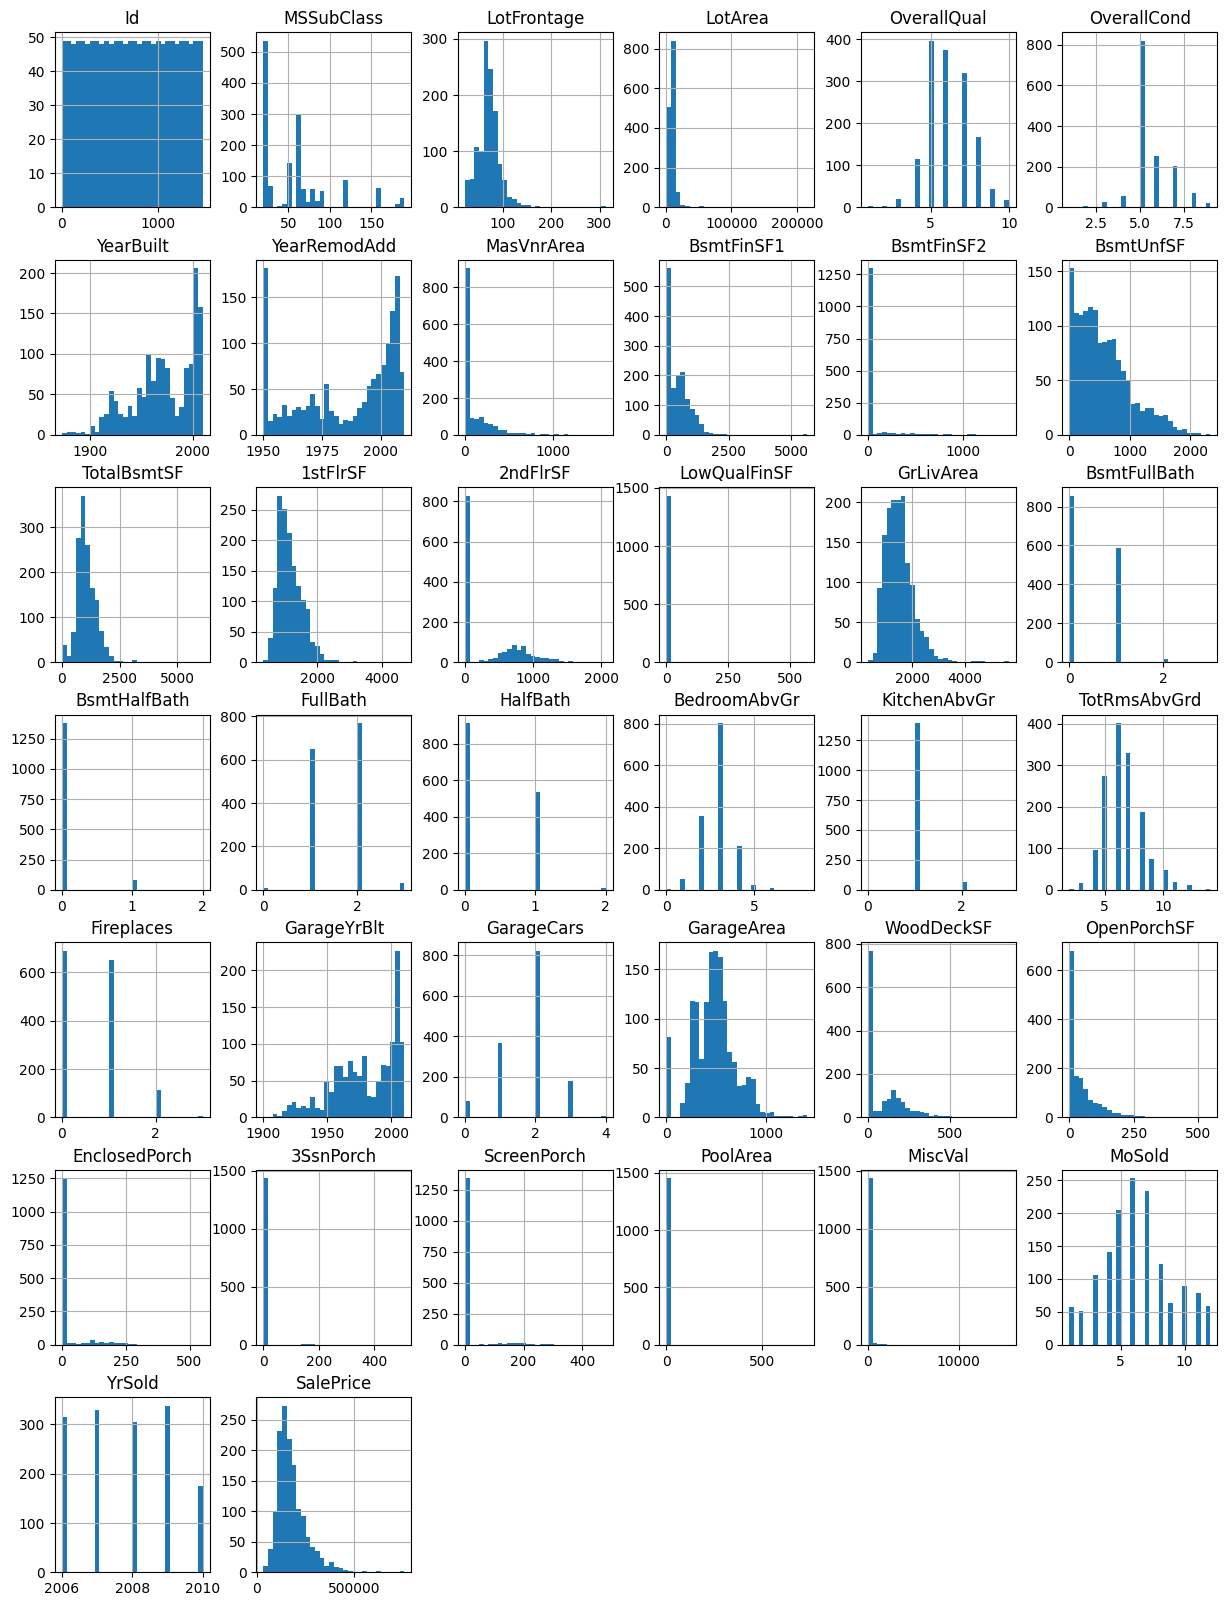

In [70]:
train_num.hist(figsize=(15,20),bins=30)

In [15]:
from sklearn.preprocessing import OneHotEncoder

s = (train.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  43


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

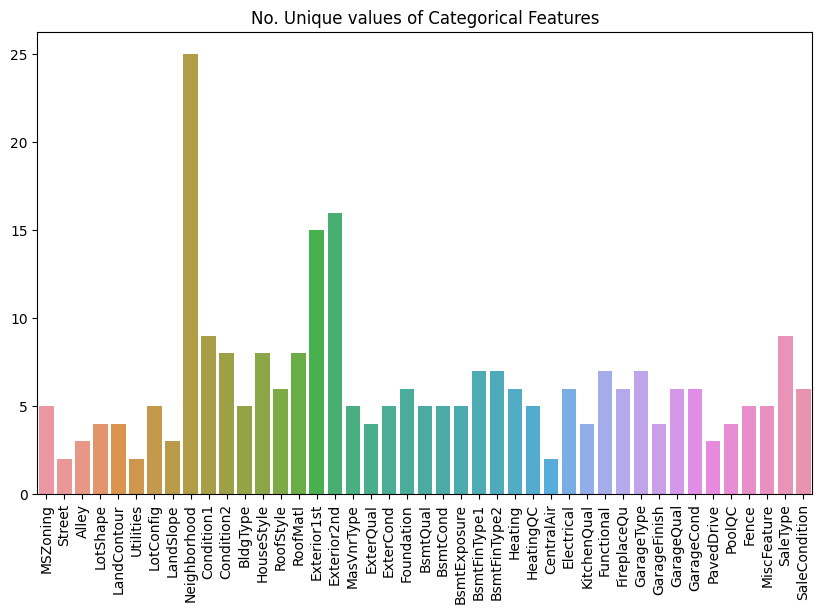

In [16]:
unique_values = []
for col in object_cols:
  unique_values.append(train[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


<ipython-input-17-e2cb23fe3a0b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


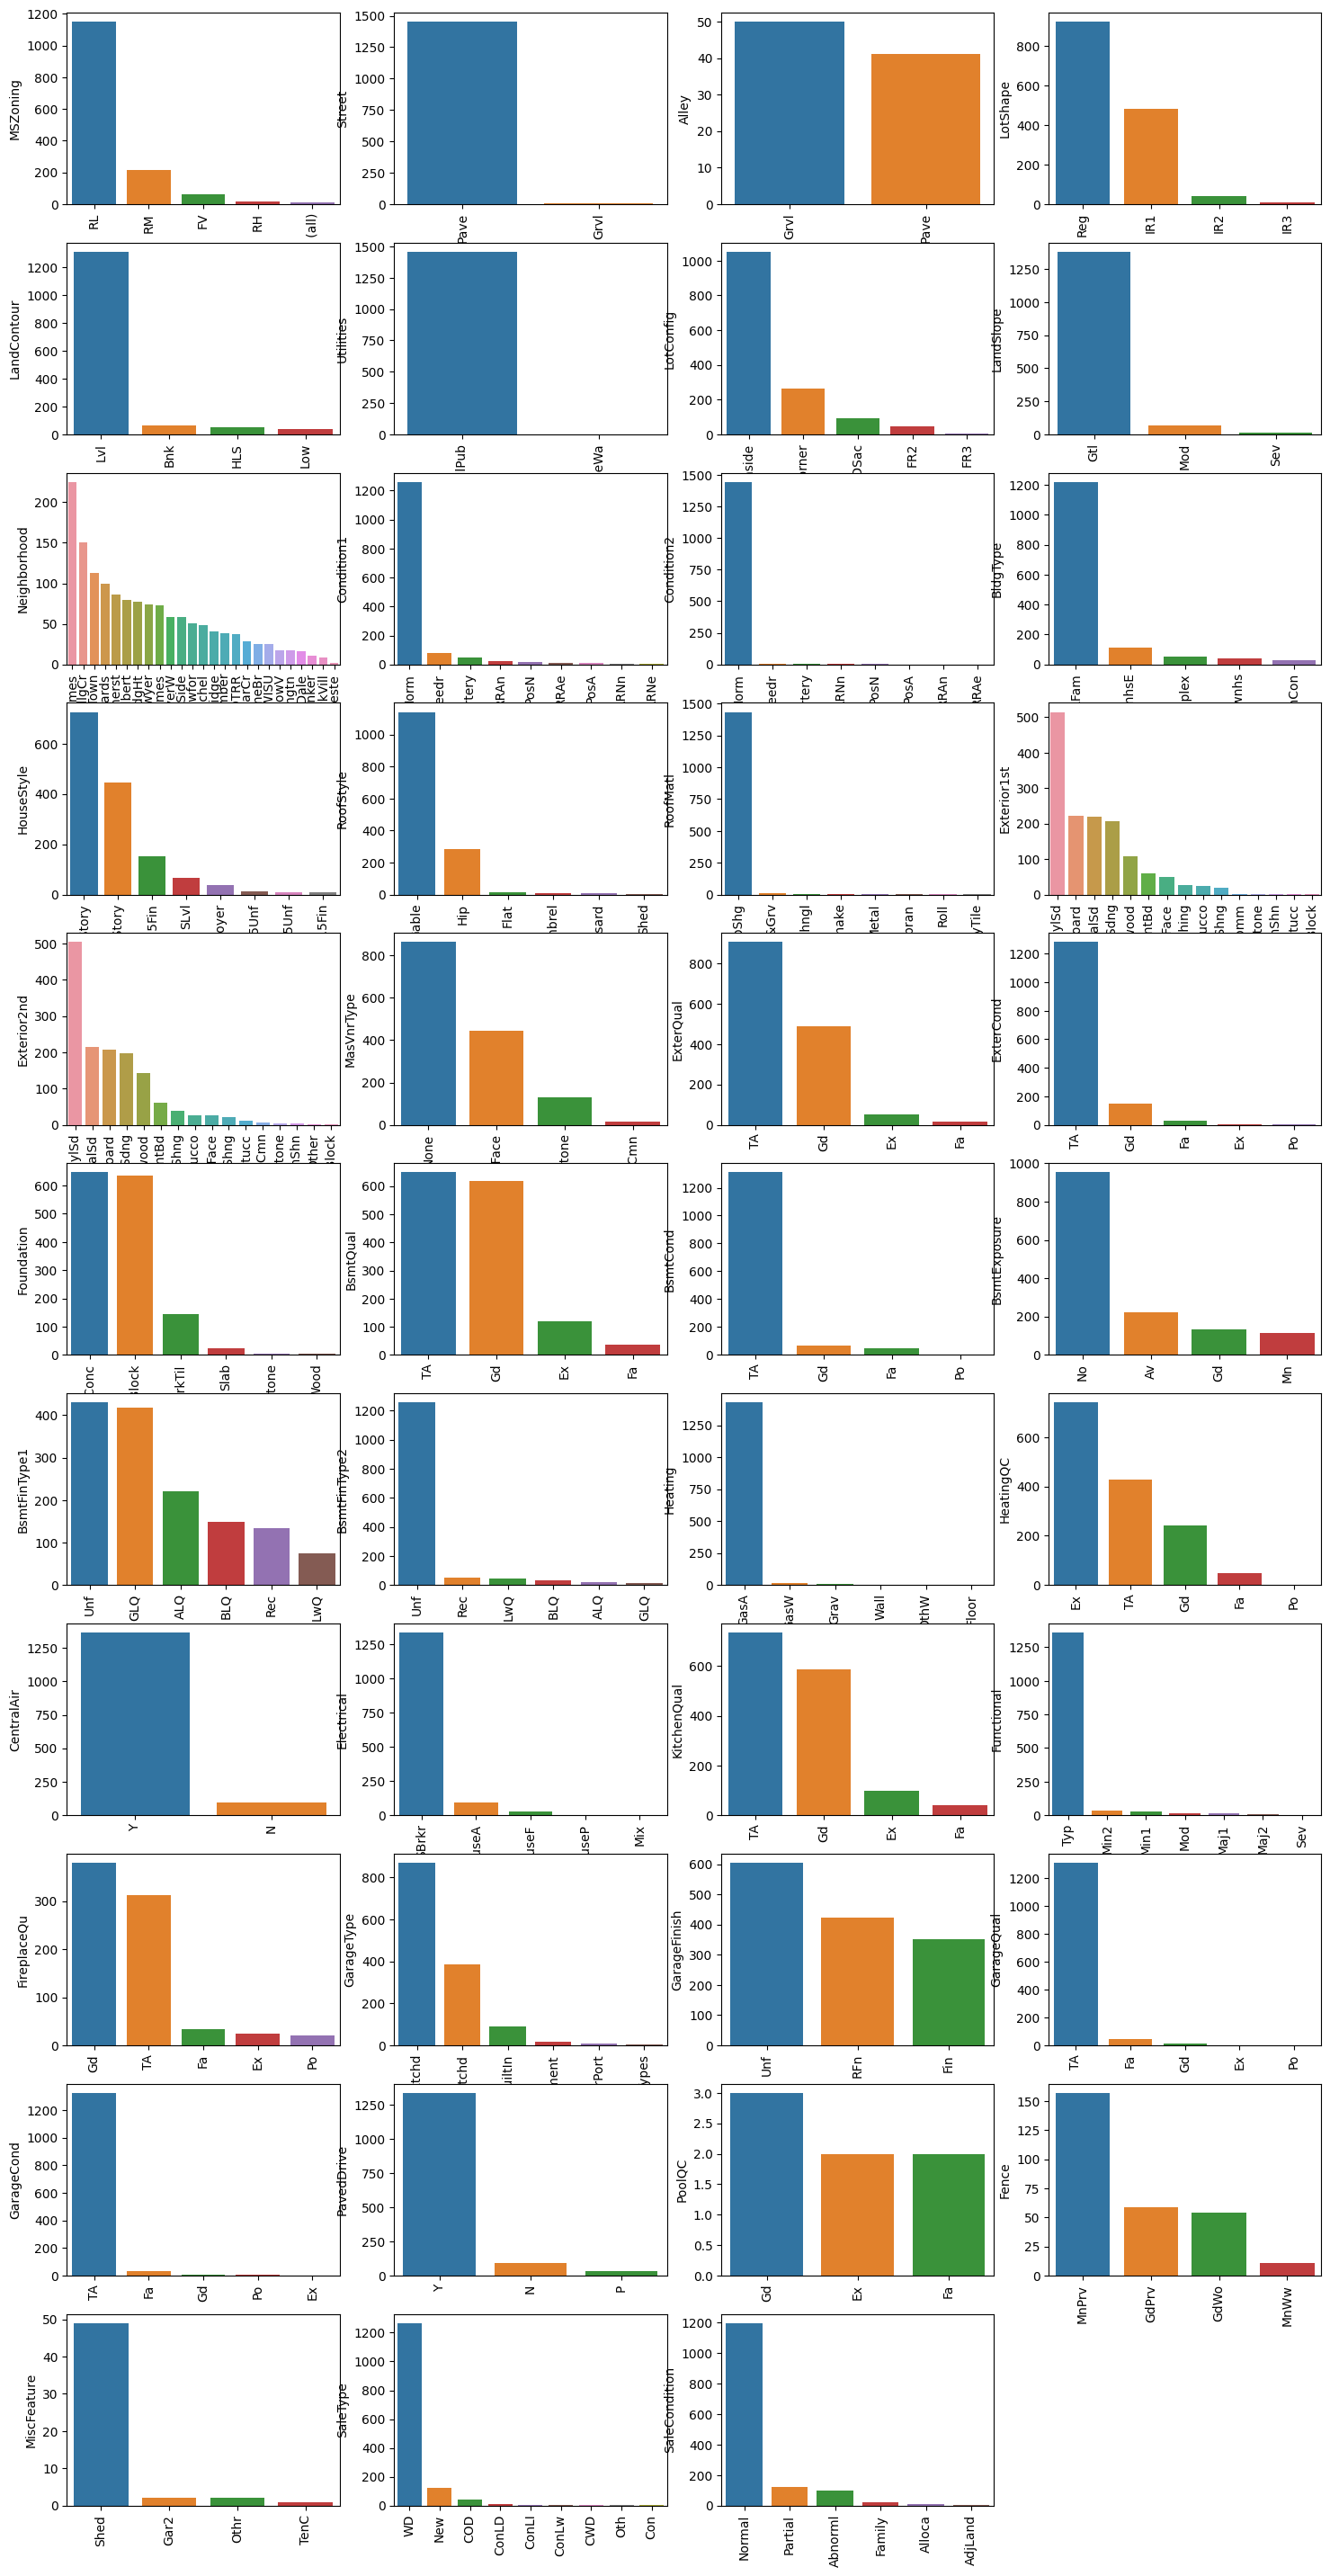

In [17]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = train[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


This dataset contains a mix of numeric, categorical and missing features. We are going to use TensorFLow (decision trees based approach) which supports all these feature types natively, and no preprocessing is required.

**Model Building and training**

In [18]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1030 examples in training, 430 examples in testing.


We need to convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).

Why use TensorFLow?


*  TensorFlow provides high-level APIs like Keras for building and training neural networks with ease.
*   Keras is a high-level neural networks API that runs on top of various deep learning frameworks, including TensorFlow.
*   Keras makes it easy to utilize pre-trained models, such as those from the TensorFlow Hub or other sources for projects such as Housing Price Prediction
*   Keras simplifies the process of building and training neural networks, making it easier to create models that can learn from the data and make accurate predictions.





In [19]:
import tensorflow as tf


In [ ]:
#!pip install tensorflow tensorflow_decision_forests

In [20]:
import tensorflow_decision_forests as tfdf
from tensorflow_decision_forests import keras

In [21]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task =tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task =tfdf.keras.Task.REGRESSION)

In [22]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

It gives the following models:


*   Random Forest Model
*   Gradient Boosted Trees Model
*   Cart Model
*   Distributed Gradient Boosted Trees Model





Choosing a Random Forest Model because this is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.Create a random forest.

1. Create a Random Forest

In [23]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmps1kja959 as temporary training directory


2. Train the model

In [24]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:06.271685. Found 1030 examples.
Training model...
Model trained in 0:00:05.005595
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


3. Visualize and Evaluate the model: The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [25]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)


Before training the dataset, 20% was manually seperated for validation named as valid_ds.

Out of bag (OOB) score can also be used to validate the RandomForestModel. While training a model like a decision tree or a random forest, the dataset is randomly into different subsets or "bags" for training. Some of the data points won't be used to train a particular tree or model because they were left out when forming the training set for that tree. The OOB score is a way to see how well the model is performing on these "left-out" data points.

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model.

Note: Smaller values are better for this hyperparameter.

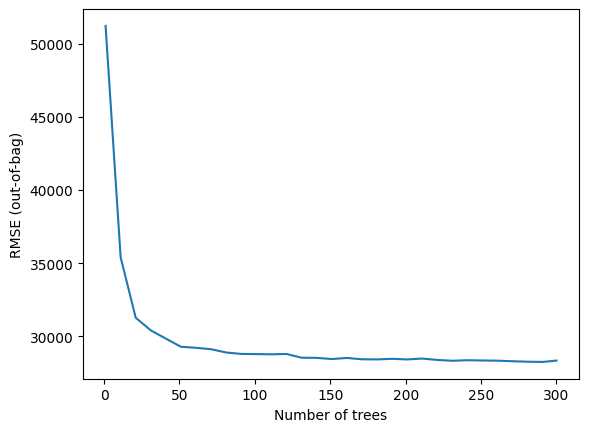

In [27]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

It can be observed that as the number of trees increases RMSE decreases, which is ideal.

In [28]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1030, accuracy=None, loss=None, rmse=28339.89828755599, ndcg=None, aucs=None, auuc=None, qini=None)

In [30]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 566ms/step - loss: 0.0000e+00 - mse: 928331264.0000
loss: 0.0000
mse: 928331264.0000


**Variable importance**: It generally indicate how much a feature contributes to the model predictions or quality. The available Variable Importances for Decision Trees are as follows:

In [31]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES



*   **MEAN_MIN_DEPTH** means the mean of the minimum depth of a feature in all the trees in a forest. A low value indicates that a lot of observations are categorized based on this feature. This means lower the value, better the feature.
*   **NUM_AS_ROOT** indicates how many times the given feature was the root of the tree. The higher the better.
*   **NUM_NODES** metric shows how many times a given feature was used as a node for splitting the observations in a tree.
*   **SUM_SCORE** metric indicates the sum of the split scores using a specific feature. The larger, the most important.





In [32]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 106.0),
 ("ExterQual" (4; #22), 57.0),
 ("Neighborhood" (4; #59), 47.0),
 ("GarageCars" (1; #32), 37.0),
 ("GrLivArea" (1; #38), 15.0),
 ("YearBuilt" (1; #76), 11.0),
 ("KitchenQual" (4; #44), 10.0),
 ("TotalBsmtSF" (1; #73), 9.0),
 ("BsmtQual" (4; #14), 4.0),
 ("GarageArea" (1; #31), 3.0),
 ("GarageFinish" (4; #34), 1.0)]

In [33]:
inspector.variable_importances()["SUM_SCORE"]

[("OverallQual" (1; #62), 461955151702032.6),
 ("Neighborhood" (4; #59), 284883138788431.5),
 ("GrLivArea" (1; #38), 187899694066584.97),
 ("ExterQual" (4; #22), 161673638147978.5),
 ("GarageCars" (1; #32), 158328218123865.0),
 ("TotalBsmtSF" (1; #73), 84664728956667.6),
 ("1stFlrSF" (1; #0), 58495840148933.33),
 ("GarageArea" (1; #31), 46173744380463.56),
 ("BsmtFinSF1" (1; #8), 39248738420476.875),
 ("2ndFlrSF" (1; #1), 37559542726951.125),
 ("YearBuilt" (1; #76), 34632246155452.67),
 ("KitchenQual" (4; #44), 32359443149312.75),
 ("BsmtQual" (4; #14), 31741723118592.0),
 ("MasVnrArea" (1; #54), 21827161042069.875),
 ("LotArea" (1; #47), 20421389191791.125),
 ("FullBath" (1; #29), 19468738303150.5),
 ("GarageFinish" (4; #34), 15202538388051.5),
 ("Exterior2nd" (4; #24), 11532654600158.25),
 ("Exterior1st" (4; #23), 10396934727171.312),
 ("YearRemodAdd" (1; #77), 9706057656624.938),
 ("Fireplaces" (1; #27), 7896709297884.375),
 ("BsmtUnfSF" (1; #15), 7628354435315.875),
 ("WoodDeckSF" 

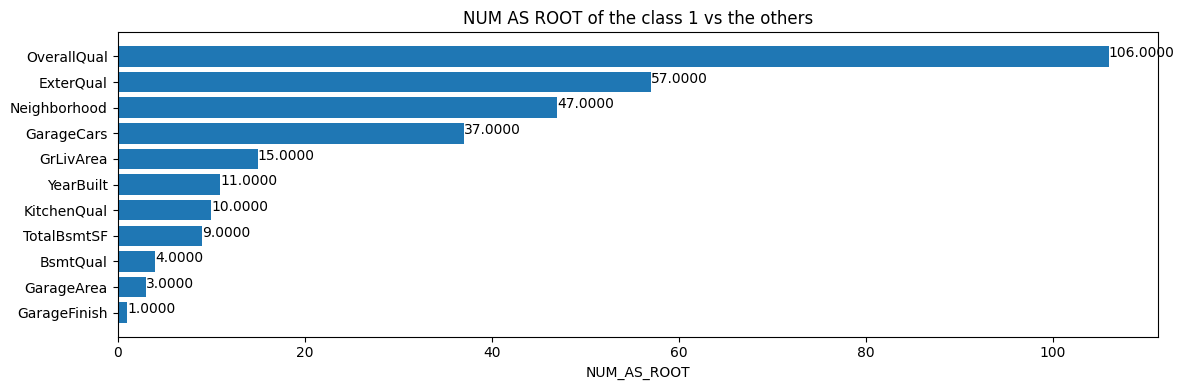

In [34]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

OverallQual comes out to be the most important feature whereas, GarageFinish is not so important.

**Predict on the test data**



In [36]:
ids = test.pop('Id')

test= tfdf.keras.pd_dataframe_to_tf_dataset(
    test,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 5s 69ms/step


,Id,SalePrice
0,1461,127186.898438
1,1462,153734.703125
2,1463,180935.968750
3,1464,182055.734375
4,1465,198161.203125
